In [314]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
#force output to display the full description
pd.set_option('display.max_colwidth', -1)

In [ ]:
wine_data = pd.read_csv("../data/raw/wine-reviews/winemag-data-130k-v2.csv", index_col=0)

In [95]:
#create connection to database
conn = sqlite3.connect('db\wine_data.sqlite')
c = conn.cursor()

In [62]:
wine_data['country'] = wine_data['country'].fillna("Unknown")
wine_data['designation'] = wine_data['designation'].fillna("Unknown")
wine_data['province'] = wine_data['province'].fillna("Unknown")
wine_data['region_1'] = wine_data['region_1'].fillna("Unknown")
wine_data['region_2'] = wine_data['region_2'].fillna("Unknown")
wine_data['taster_name'] = wine_data['taster_name'].fillna("Unknown")
wine_data['taster_twitter_handle'] = wine_data['taster_twitter_handle'].fillna("Unknown")
wine_data['variety'] = wine_data['variety'].fillna("Unknown")
wine_data['price'] = wine_data['price'].fillna(0)

#Drop the duplicate descriptions
wine_data = wine.drop_duplicates('description') # 10016 duplicates

In [ ]:
wine_data.to_sql('wine_data', conn, if_exists = "replace")

In [67]:
wine_data.shape

(119955, 13)

In [70]:
wine_data[wine_data['price']==0]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,Unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,0.0,Sicily & Sardinia,Etna,Unknown,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,0.0,Beaujolais,Beaujolais-Villages,Unknown,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,0.0,Sicily & Sardinia,Sicilia,Unknown,Unknown,Unknown,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,0.0,Sicily & Sardinia,Sicilia,Unknown,Unknown,Unknown,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129844,Italy,"Doga delle Clavule is a neutral, mineral-drive...",Doga delle Clavule,86,0.0,Tuscany,Morellino di Scansano,Unknown,Unknown,Unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129860,Portugal,This rich wine has a firm structure as well as...,Pacheca Superior,90,0.0,Douro,Unknown,Unknown,Roger Voss,@vossroger,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129863,Portugal,This mature wine that has 50% Touriga Nacional...,Reserva,90,0.0,Dão,Unknown,Unknown,Roger Voss,@vossroger,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129893,Italy,"Aromas of passion fruit, hay and a vegetal not...",Corte Menini,91,0.0,Veneto,Soave Classico,Unknown,Kerin O’Keefe,@kerinokeefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare


In [72]:
wine_data.isna().sum() # no "taster_name", "taster_twitter_handle"

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [30]:
# wine.to_csv("../data/processed/winemag-data-130k-processed.csv")

In [38]:
wine150k = pd.read_csv("../data/raw/wine-reviews/winemag-data_first150k.csv", index_col=0)

In [187]:
wine_sample = wine_data.sample(n=10000, random_state=2020)

In [75]:
wine_sample.shape

(10000, 13)

In [76]:
wine_data.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [77]:
wine_data["country"].value_counts()

US                        50448
France                    20351
Italy                     17921
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3543
Austria                    3033
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      431
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Unknown                      59
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine 

In [53]:
wine['designation'].value_counts()

Reserve                          2009
Estate                           1322
Reserva                          1259
Riserva                           698
Estate Grown                      621
                                 ... 
Luziafeld                           1
Blecua                              1
Proyecto Cu4tro Blanco              1
Abtsberg Spätlese Grosse Lage       1
Giancòla                            1
Name: designation, Length: 37979, dtype: int64

In [59]:
37465/wine_data_num

0.28825661109016626

In [60]:
2009/wine_data_num

0.015457294319502043

designation
* 28.8% is null
* 1.5 % is Reserve



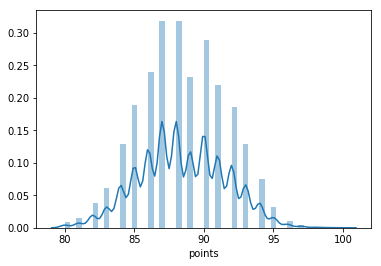

In [79]:
sns.distplot(wine_data['points'])

In [80]:
wine_data['points'].describe()

count    119955.000000
mean         88.442291
std           3.093029
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

* All points has value. 
* 80 - 100 

price
max:3300

In [103]:
wine_price_0_200 = wine_data[(wine['price']>0) & (wine['price']<200)]
wine_price_200_1000 = wine[(wine['price']>200) & (wine['price']<1000)]
wine_price_1000_2000 = wine[(wine['price']>1000) & (wine['price']<2000)]
wine_price_2000_3300 = wine[(wine['price']>2000) & (wine['price']<=3300)]

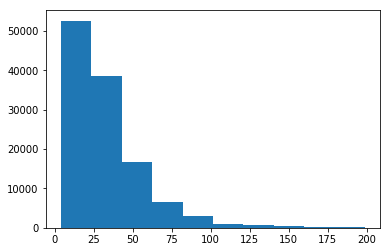

In [94]:
plt.hist(wine_price_0_200['price']);

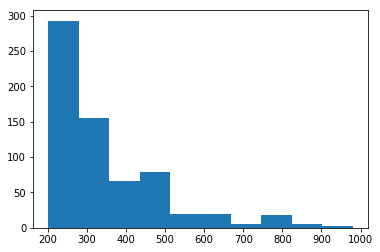

In [96]:
plt.hist(wine_price_200_1000['price']);

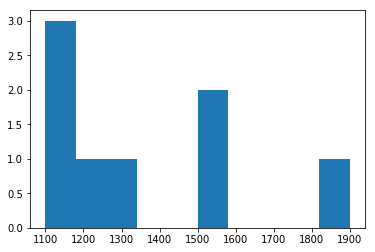

In [104]:
plt.hist(wine_price_1000_2000['price']);

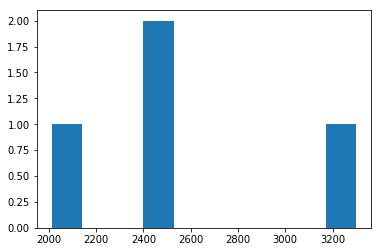

In [105]:
plt.hist(wine_price_2000_3300['price']);

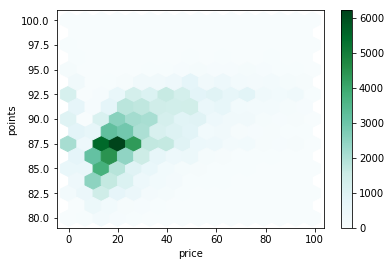

In [82]:
wine_data[wine_data['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

Bag of Words
* Basic Cleaning and Tokenization
* Stemming, Lemmatization, and Stop Words
* Vectorization Strategies
* TF-IDF Vectorization

In [315]:
#dependencies

import sqlite3
from sqlite3 import Error
import re
from wordcloud import WordCloud

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
#force output to display the full description
pd.set_option('display.max_colwidth', -1)

In [96]:
#create the pandas data frame
wine_df = pd.read_sql('Select title, description, points, price from wine_data', conn)

In [101]:
wine_df.head()

,title,description,points,price,word_count
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",87,0.0,24
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",87,15.0,39
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",87,14.0,28
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,33
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",87,65.0,41


In [99]:
#inline function to produce word count, splitting on spaces
wine_df['word_count'] = wine_df['description'].apply(lambda x: len(str(x).split(" ")))
wine_df.word_count.describe()

count    119955.000000
mean         40.424451
std          11.206029
min           3.000000
25%          33.000000
50%          40.000000
75%          47.000000
max         135.000000
Name: word_count, dtype: float64

## Visualize the distribution of word counts. It is normal distribution.

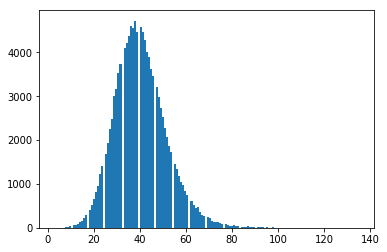

In [121]:
#set x for the histogram and set bins based on max 
x = wine_df['word_count']
n_bins = 150
#plot histogram
plt.hist(x, bins=n_bins)
plt.show()

In [157]:
wine_sample

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
126714,Italy,Pretty citrus tones are backed by white peach ...,Millesimato Val d'Oca Extra Dry,86,0.0,Veneto,Prosecco di Valdobbiadene,Unknown,Unknown,Unknown,Cantina Produttori di Valdobbiadene 2006 Mille...,Prosecco,Cantina Produttori di Valdobbiadene
92160,France,Pale salmon color with some copper hints. Some...,Brut Rosé,88,0.0,Alsace,Alsace,Unknown,Unknown,Unknown,Jean-Baptiste Adam NV Brut Rosé Sparkling (Als...,Sparkling Blend,Jean-Baptiste Adam
123939,France,This second wine of Calon Ségur is beautifully...,Le Marquis de Calon Ségur,93,25.0,Bordeaux,Saint-Estèphe,Unknown,Roger Voss,@vossroger,Château Calon Ségur 2014 Le Marquis de Calon S...,Bordeaux-style Red Blend,Château Calon Ségur
70339,Argentina,"Gritty, oily matchstick aromas are followed by...",Unknown,83,20.0,Mendoza Province,Valle de Uco,Unknown,Michael Schachner,@wineschach,Cadus 2014 Chardonnay (Valle de Uco),Chardonnay,Cadus
14358,Italy,The wine's beauty and intensity are impossible...,Altero,94,115.0,Tuscany,Brunello di Montalcino,Unknown,Unknown,Unknown,Poggio Antico 2004 Altero (Brunello di Montal...,Sangiovese Grosso,Poggio Antico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91864,Italy,This Pinot Grigio has an intriguing copper col...,Dessimis,85,39.0,Northeastern Italy,Friuli Isonzo,Unknown,Kerin O’Keefe,@kerinokeefe,Vie di Romans 2011 Dessimis Pinot Grigio (Friu...,Pinot Grigio,Vie di Romans
74293,France,"This is an exceptionally rich wine, its fruit ...",Rosenberg,90,0.0,Alsace,Alsace,Unknown,Roger Voss,@vossroger,Domaine Barmès-Buecher 2010 Rosenberg Pinot Bl...,Pinot Blanc,Domaine Barmès-Buecher
33112,South Africa,Here's a lively and fruit-driven Pinotage with...,Bergkelder Selection,84,12.0,Coastal Region,Unknown,Unknown,Lauren Buzzeo,@laurbuzz,Fleur Du Cap 2009 Bergkelder Selection Pinotag...,Pinotage,Fleur Du Cap
7621,New Zealand,"Unmistakably a Kiwi Pinot Noir, with notes of ...",Three Paddles,87,20.0,Martinborough,Unknown,Unknown,Unknown,Unknown,Nga Waka 2015 Three Paddles Pinot Noir (Martin...,Pinot Noir,Nga Waka


In [150]:
for index, row in df.iterrows():
    print(row['c1'], row['c2'])

10 100
11 110
12 120


In [286]:
#loops through descriptions and cleans them
clean_desc_w_stop = []
for index, row in wine_sample.iterrows():
    desc = row['description'].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc_w_stop.append(desc)
#assign the cleaned descriptions to the data frame
wine_sample['clean_desc_w_stop'] = clean_desc_w_stop
# type(clean_desc)

In [291]:
def remove_stopwords(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [293]:
clean_desc_wo_stopwords = list(map(remove_stopwords, clean_desc_w_stop))
wine_sample['clean_desc_wo_stop'] = clean_desc_wo_stopwords

In [296]:
wine_sample.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_desc,clean_desc_w_stop,clean_desc_wo_stop
126714,Italy,"Pretty citrus tones are backed by white peach and soapy floral notes to produce a clean, fresh sparkler that is easy and approachable. The wine is beautifully crisp with smooth citrus flavors that leave a lasting impression.",Millesimato Val d'Oca Extra Dry,86,0.0,Veneto,Prosecco di Valdobbiadene,Unknown,Unknown,Unknown,Cantina Produttori di Valdobbiadene 2006 Millesimato Val d'Oca Extra Dry (Prosecco di Valdobbiadene),Prosecco,Cantina Produttori di Valdobbiadene,pretty citrus tones are backed by white peach and soapy floral notes to produce a clean fresh sparkler that is easy and approachable the wine is beautifully crisp with smooth citrus flavors that leave a lasting impression,pretty citrus tones are backed by white peach and soapy floral notes to produce a clean fresh sparkler that is easy and approachable the wine is beautifully crisp with smooth citrus flavors that leave a lasting impression,"[pretty, citrus, tones, backed, white, peach, soapy, floral, notes, produce, clean, fresh, sparkler, easy, approachable, beautifully, crisp, smooth, citrus, flavors, leave, lasting, impression]"
92160,France,"Pale salmon color with some copper hints. Somewhat muted nose with subtle aromas of ripe red-berry fruit. Crisp with more lift on the palate, vigorous mousse and lively flavors of redcurrant, wild strawberry and cherry. Medium-bodied with some creaminess to the texture that persists on the finish. Well-made but not very complex.",Brut Rosé,88,0.0,Alsace,Alsace,Unknown,Unknown,Unknown,Jean-Baptiste Adam NV Brut Rosé Sparkling (Alsace),Sparkling Blend,Jean-Baptiste Adam,pale salmon color with some copper hints somewhat muted nose with subtle aromas of ripe red berry fruit crisp with more lift on the palate vigorous mousse and lively flavors of redcurrant wild strawberry and cherry medium bodied with some creaminess to the texture that persists on the finish well made but not very complex,pale salmon color with some copper hints somewhat muted nose with subtle aromas of ripe red berry fruit crisp with more lift on the palate vigorous mousse and lively flavors of redcurrant wild strawberry and cherry medium bodied with some creaminess to the texture that persists on the finish well made but not very complex,"[pale, salmon, color, copper, hints, somewhat, muted, nose, subtle, aromas, ripe, red, berry, fruit, crisp, lift, palate, vigorous, mousse, lively, flavors, redcurrant, wild, strawberry, cherry, medium, bodied, creaminess, texture, persists, finish, well, made, complex]"
123939,France,"This second wine of Calon Ségur is beautifully proportioned. It is fruity with rich tannins. At the same time, the crisp fruit of the vintage gives a lift to the deep concentration. Let the wine develop over several years. Drink from 2024.",Le Marquis de Calon Ségur,93,25.0,Bordeaux,Saint-Estèphe,Unknown,Roger Voss,@vossroger,Château Calon Ségur 2014 Le Marquis de Calon Ségur (Saint-Estèphe),Bordeaux-style Red Blend,Château Calon Ségur,this second wine of calon s gur is beautifully proportioned it is fruity with rich tannins at the same time the crisp fruit of the vintage gives a lift to the deep concentration let the wine develop over several years drink from,this second wine of calon s gur is beautifully proportioned it is fruity with rich tannins at the same time the crisp fruit of the vintage gives a lift to the deep concentration let the wine develop over several years drink from,"[second, calon, gur, beautifully, proportioned, fruity, rich, tannins, time, crisp, fruit, vintage, gives, lift, deep, concentration, let, develop, several, years]"
70339,Argentina,"Gritty, oily matchstick aromas are followed by a blocky palate with apricot, peach pit and citrus flavors. On the finish, a lasting flavor of citrus rind is tough and pithy. Overall this is hard to 

In [297]:
total_vocab = set()
for comment in clean_desc_wo_stopwords:
    total_vocab.update(comment)
len(total_vocab)

11490

In [303]:
words_concat = []
for article in clean_desc_wo_stopwords:
    words_concat += article
len(words_concat)

242048

In [312]:
words_freqdist = FreqDist(words_concat)
words_freqdist.most_common(100)

[('flavors', 4837),
 ('fruit', 3831),
 ('aromas', 2958),
 ('palate', 2903),
 ('acidity', 2727),
 ('finish', 2640),
 ('tannins', 2389),
 ('black', 2283),
 ('cherry', 2195),
 ('ripe', 2179),
 ('red', 1601),
 ('spice', 1463),
 ('notes', 1450),
 ('oak', 1428),
 ('rich', 1403),
 ('fresh', 1328),
 ('berry', 1326),
 ('dry', 1320),
 ('nose', 1261),
 ('full', 1207),
 ('plum', 1123),
 ('fruits', 1103),
 ('apple', 1057),
 ('sweet', 1050),
 ('well', 1027),
 ('soft', 1005),
 ('blend', 999),
 ('white', 991),
 ('crisp', 964),
 ('texture', 962),
 ('offers', 956),
 ('blackberry', 951),
 ('dark', 926),
 ('light', 920),
 ('shows', 877),
 ('citrus', 864),
 ('bodied', 861),
 ('cabernet', 861),
 ('vanilla', 849),
 ('green', 817),
 ('bright', 811),
 ('pepper', 768),
 ('firm', 742),
 ('juicy', 734),
 ('lemon', 723),
 ('good', 719),
 ('fruity', 708),
 ('character', 675),
 ('raspberry', 673),
 ('balanced', 667),
 ('chocolate', 652),
 ('peach', 650),
 ('touch', 634),
 ('structure', 621),
 ('years', 606),
 ('wood

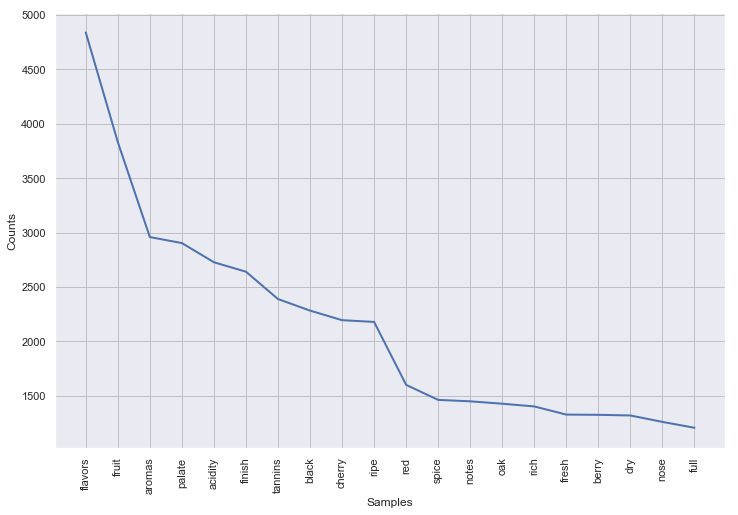

In [313]:
words_freqdist.plot(20, cumulative=False);

## TF-IDF

In [316]:
vectorizer = TfidfVectorizer()
tf_idf_clean_desc_w_stop = vectorizer.fit_transform(clean_desc_w_stop)

In [317]:
tf_idf_clean_desc_w_stop.shape

(10000, 11605)

In [320]:
type(tf_idf_clean_desc_w_stop)

scipy.sparse.csr.csr_matrix

In [319]:
# Get the count of explicitly-stored values (nonzeros)
tf_idf_clean_desc_w_stop.nnz  

340899

In [209]:
#calculate the frequency
word_frequency = pd.Series(' '.join(wine_sample['clean_desc']).split()).value_counts()[:20]
word_frequency

and        26431
the        17094
a          13815
of         13231
with       9290 
this       8749 
is         7283 
it         6644 
wine       6269 
in         4876 
flavors    4837 
to         4327 
s          4195 
fruit      3831 
on         3502 
that       3167 
aromas     2958 
palate     2903 
acidity    2727 
finish     2640 
dtype: int64

In [167]:
stop_words = set(stopwords.words("english"))
#show how many words are in the list of stop words
print(len(stop_words))

179


In [168]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [169]:
#add single word to stoplist
#stop_words.add("wine")

#add list of words to stoplist
add_stopwords = ["wine", "drink"]
stop_words = stop_words.union(add_stopwords)
print(len(stop_words))

181


In [356]:
pri_words = ["fruity", "spicy", "floral", "microbiological", "oxidized", "pungent",
                "chemical","earthy","woody","caramel","nutty","herbaceous","vegetative"]

sec_words = ["citrus","berry","tree","fruit","tropical","dried","spicy","floral",
             "yeasty","lactic","oxidized","cool","hot","pungent","sulfur",
             "petroleum","moldy","earthy","burned","phenolic","resinous",
             "caramel","nutty","fresh","canned","cooked","dried"]

ter_words = [#fruity
    "grapefruit", "lemon", "blackberry", "raspberry", "strawberry", "currant",
    "cassis","cherry", "apricot", "peach", "apple", "pineapple", "melon", "banana",
    "jam", "raisin", "prune", "fig", "candied", "concord", "artificial", 
    "methyl", "anthranilate", 
    # spicy
    "licorice", "anise", "pepper", "cloves", 
    # floral
    "geranium", "violet", "rose","orange", "blossom",
    # mocribiological     
    "leesy", "baker", "yoghurt", "sweaty", "sauerkraut", "mousy", "horsey", "champagne"
    # oxidized 
    "oxidized", 
    # pungent
    "menthol", "alcohol", "rubbing",
    # chemical
    "sulfur", "dioxide", "ethanol", "acetic", "grain","vinegar", "acetic", "acid", 
    "polish", "ethyl", "acetate", "wool", "dog", "match", "cabbage", "skunk", 
    "garlic", "gas", "mercaptan", "egg","hydrogen", "rubbery", "diesel", "kerosene",
    "plastic", "tar", 
    # earthy
    "cork", "moldy", "mildew", "mushroom", "dusty", 
    # woody
    "smoky", "burnt", "toast", "coffee", "medicinal", "bandaid", "phenolic", "sawdust", 
    "bacon", "oak", "cedar", "vanilla", 
    # caramel
    "honey", "butterscotch", "diacetyl", "soy", "sauce", "chocolate", "molasses", 
    # nutty
    "walnut", "hazelnut", "almond",
    # herbaceous/vegetative
    "grass", "pepper", "eucalyptus", 
    "mint", "beans", "asparagus", "olive", "artichoke", "hay", "straw",
    "tea", "tobacco"]


In [373]:
flavor_words =  pri_words + sec_words + ter_words

In [374]:
flavor_words = list(set(flavor_words))

In [351]:
ter_words_lem

['grapefruit',
 'lemon',
 'blackberry',
 'raspberry',
 'strawberry',
 'currant',
 'cherry',
 'apricot',
 'peach',
 'apple',
 'pineapple',
 'melon',
 'banana',
 'jam',
 'raisin',
 'prune',
 'fig',
 'artificial',
 'methyl',
 'anthranilate',
 'licorice',
 'anise',
 'pepper',
 'clove',
 'geranium',
 'violet',
 'rose',
 'orange',
 'leesy',
 'baker',
 'yogurt',
 'sweaty',
 'sauerkraut',
 'mousy',
 'horsey',
 'oxidized',
 'menthol',
 'alcohol',
 'sulfur',
 'dioxide',
 'ethanolacetic',
 'acid',
 'ethyl',
 'acetate',
 'wool',
 'dog',
 'match',
 'cabbage',
 'skunk',
 'garlic',
 'gas',
 'hydrogen',
 'rubbery',
 'diesel',
 'kerosene',
 'plastic',
 'tar',
 'cork',
 'moldy',
 'mushroom',
 'dusty',
 'smoky',
 'Burnt',
 'toast',
 'coffee',
 'medicinal',
 'phenolic',
 'bacon',
 'oak',
 'cedar',
 'vanilla',
 'honey',
 'butterscotch',
 'diacetyl',
 'soy',
 'sauce',
 'chocolate',
 'molasses',
 'walnut',
 'hazelnut',
 'almond',
 'grass',
 'pepper',
 'eucalyptus',
 'mint',
 'bean',
 'asparagus',
 'olive',
 

In [354]:
ter_words_stem

['grapefruit',
 'lemon',
 'blackberri',
 'raspberri',
 'strawberri',
 'currant',
 'cherri',
 'apricot',
 'peach',
 'appl',
 'pineappl',
 'melon',
 'banana',
 'jam',
 'raisin',
 'prune',
 'fig',
 'artifici',
 'methyl',
 'anthranil',
 'licoric',
 'anis',
 'pepper',
 'clove',
 'geranium',
 'violet',
 'rose',
 'orang',
 'leesi',
 'baker',
 'yogurt',
 'sweati',
 'sauerkraut',
 'mousi',
 'horsey',
 'oxid',
 'menthol',
 'alcohol',
 'sulfur',
 'dioxid',
 'ethanolacet',
 'acid',
 'ethyl',
 'acet',
 'wool',
 'dog',
 'match',
 'cabbag',
 'skunk',
 'garlic',
 'gas',
 'hydrogen',
 'rubberi',
 'diesel',
 'kerosen',
 'plastic',
 'tar',
 'cork',
 'moldi',
 'mushroom',
 'dusti',
 'smoki',
 'burnt',
 'toast',
 'coffe',
 'medicin',
 'phenol',
 'bacon',
 'oak',
 'cedar',
 'vanilla',
 'honey',
 'butterscotch',
 'diacetyl',
 'soy',
 'sauc',
 'chocol',
 'molass',
 'walnut',
 'hazelnut',
 'almond',
 'grass',
 'pepper',
 'eucalyptus',
 'mint',
 'bean',
 'asparagus',
 'oliv',
 'artichok',
 'hay',
 'straw',
 'te

In [347]:
stm.stem("horsey" )
# lem.lemmatize("Horsey")

'horsey'

In [378]:
lem = WordNetLemmatizer()
pri_words_lem = [lem.lemmatize(word) for word in pri_words] 
sec_words_lem = [lem.lemmatize(word) for word in sec_words] 
ter_words_lem = [lem.lemmatize(word) for word in ter_words] 
flavor_words_lem = [lem.lemmatize(word) for word in flavor_words] 

In [379]:
stm = SnowballStemmer("english")
pri_words_stem = [stm.stem(word) for word in pri_words] 
sec_words_stem = [stm.stem(word) for word in sec_words] 
ter_words_stem = [stm.stem(word) for word in ter_words] 
flavor_words_stem = [stm.stem(word) for word in flavor_words] 

In [435]:
wine_sample['flavor_words'].head(10)

126714    [citrus, peach, floral, fresh, citrus]
92160     [fruit]                               
123939    [fruit]                               
70339     [apricot, peach, citrus, citrus]      
14358     [match, tar, currant, tobacco, oak]   
72144     [other]                               
82336     [vanilla]                             
56238     [fruit]                               
39273     [other]                               
6221      [other]                               
Name: flavor_words, dtype: object

In [393]:
def flavor_words(words):
    tokens = nltk.word_tokenize(words)
    stm = SnowballStemmer("english")
    flavor_words_list = [stm.stem(token) for token in tokens if token in flavor_words_stem]
    return flavor_words_list

In [428]:
flavor_words_list = list(map(flavor_words, clean_desc_w_stop))
flavor_words_list_other = [['other'] if x == [] else x for x in flavor_words_list]
wine_sample['flavor_words'] = flavor_words_list_other

## Lemmatizing and Stemming

In [344]:
# Use Stemming

In [211]:
stem_desc = []
for index, row in wine_sample.iterrows():
    split_text = row['clean_desc'].split()
    
    ##Stemming
    stm = SnowballStemmer("english")
    split_text = [stm.stem(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    stem_desc.append(split_text)
    
    #Lemmatisation
#     lem = WordNetLemmatizer()
#     split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
#     split_text = " ".join(split_text)
#     stem_desc.append(split_text)
stem_desc

['pretti citrus tone back white peach soapi floral note produc clean fresh sparkler easi approach beauti crisp smooth citrus flavor leav last impress',
 'pale salmon color copper hint somewhat mute nose subtl aroma ripe red berri fruit crisp lift palat vigor mouss live flavor redcurr wild strawberri cherri medium bodi creami textur persist finish well made complex',
 'second calon gur beauti proport fruiti rich tannin time crisp fruit vintag give lift deep concentr let develop sever year',
 'gritti oili matchstick aroma follow blocki palat apricot peach pit citrus flavor finish last flavor citrus rind tough pithi overal hard plow',
 'beauti intens imposs match enorm complex aroma chocol black tar spice blackberri forest currant tobacco pick toast oak tone well care balanc within natur suppl smooth essenc standout brunello',
 'pinot noir domin intens acid well attract rich white fruit touch matur ripe give full bodi charact add toasti well integr readi',
 'full bodi robust concentr choc

In [222]:
lemm_desc = []
for index, row in wine_sample.iterrows():
    split_text = row['clean_desc'].split()
    
    #Stemming
#     stm = SnowballStemmer("english")
#     split_text = [stm.stem(word) for word in split_text if not word in stop_words] 
#     split_text = " ".join(split_text)
#     stem_desc.append(split_text)
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
    split_text = " ".join(split_text)
    lemm_desc.append(split_text)
lemm_desc

['pretty citrus tone backed white peach soapy floral note produce clean fresh sparkler easy approachable beautifully crisp smooth citrus flavor leave lasting impression',
 'pale salmon color copper hint somewhat muted nose subtle aroma ripe red berry fruit crisp lift palate vigorous mousse lively flavor redcurrant wild strawberry cherry medium bodied creaminess texture persists finish well made complex',
 'second calon gur beautifully proportioned fruity rich tannin time crisp fruit vintage give lift deep concentration let develop several year',
 'gritty oily matchstick aroma followed blocky palate apricot peach pit citrus flavor finish lasting flavor citrus rind tough pithy overall hard plow',
 'beauty intensity impossible match enormous complexity aroma chocolate black tar spice blackberry forest currant tobacco pick toasted oak tone well carefully balanced within naturally supple smooth essence standout brunello',
 'pinot noir dominated intense acidity well attractive rich white fru

In [221]:
wine_sample['clean_desc'].head(1)

126714    pretty citrus tones are backed by white peach and soapy floral notes to produce a clean fresh sparkler that is easy and approachable the wine is beautifully crisp with smooth citrus flavors that leave a lasting impression 
Name: clean_desc, dtype: object

In [216]:
stem_desc[0]

'pretti citrus tone back white peach soapi floral note produc clean fresh sparkler easi approach beauti crisp smooth citrus flavor leav last impress'

In [223]:
lemm_desc[0]

'pretty citrus tone backed white peach soapy floral note produce clean fresh sparkler easy approachable beautifully crisp smooth citrus flavor leave lasting impression'

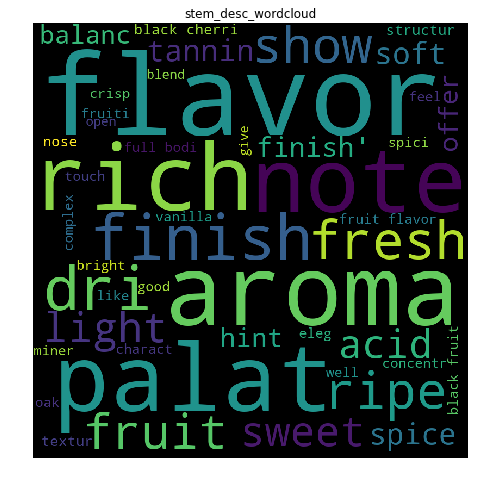

In [241]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(stem_desc))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.title("stem_desc_wordcloud")
plt.axis('off')
plt.show()
#fig.savefig("stem_desc_wordcloud.png")

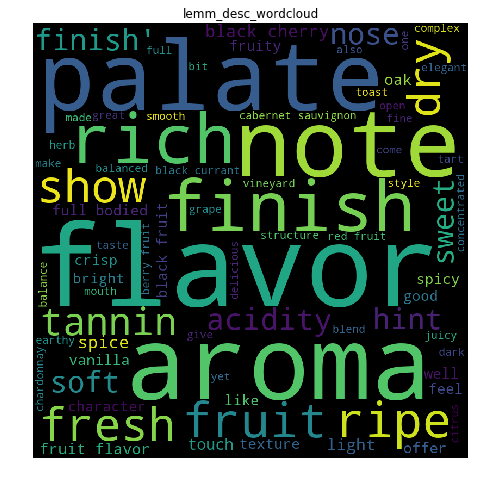

In [240]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(lemm_desc))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.title("lemm_desc_wordcloud")
plt.axis('off')
plt.show()

#fig.savefig("lemm_desc_wordcloud.png", dpi=900)

## Analyzing n-grams
analyzing three-word groups

In [250]:
clean_desc[0]

'pretty citrus tones are backed by white peach and soapy floral notes to produce a clean fresh sparkler that is easy and approachable the wine is beautifully crisp with smooth citrus flavors that leave a lasting impression '

In [254]:
def get_bigrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (2,2), max_features = 20000).fit(descriptions)
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

#run the function on the processed descriptions
bigrams = get_bigrams(clean_desc, n=15)
#create a trigram data frame
bigram_df = pd.DataFrame(bigrams)
bigram_df.columns=["Bigram", "Freq"]
#output top 15 rows
bigram_df.head(15)

,Bigram,Freq
0,on the,2550
1,the palate,1838
2,this is,1831
3,this wine,1428
4,aromas of,1342
5,the finish,1308
6,in the,1277
7,the wine,1271
8,flavors of,1228
9,the nose,988


In [242]:
def get_trigrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (3,3), max_features = 20000).fit(descriptions)
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

#run the function on the processed descriptions
trigrams = get_trigrams(clean_desc, n=15)
#create a trigram data frame
trigram_df = pd.DataFrame(trigrams)
trigram_df.columns=["Trigram", "Freq"]
#output top 15 rows
trigram_df.head(15)

,Trigram,Freq
0,on the palate,696
1,on the finish,633
2,on the nose,578
3,the palate is,428
4,the wine is,413
5,in the mouth,371
6,this wine is,337
7,ready to drink,299
8,as well as,268
9,the finish is,233


In [255]:
def get_quadgrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (4,4), max_features = 20000).fit(descriptions)
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

#run the function on the processed descriptions
quadgrams = get_quadgrams(clean_desc, n=15)
#create a trigram data frame
quadgram_df = pd.DataFrame(quadgrams)
quadgram_df.columns=["Quadgram", "Freq"]
#output top 15 rows
quadgram_df.head(15)

,Quadgram,Freq
0,the nose of this,190
1,on the palate with,144
2,on the nose of,142
3,is ready to drink,100
4,the nose the palate,95
5,opens with aromas of,92
6,on the nose the,87
7,on the nose with,74
8,the nose on this,74
9,blend of cabernet sauvignon,73


In [257]:
stops = ['wine', 'the', 'drink', 'an','a', 'cabernet', 'sauvignon', 'black', 'cherry']

stem_desc = []
for index, row in wine_sample.iterrows():
# for w in range(len(wine_df['clean_desc'])):
    split_text = row['clean_desc'].split()   
    #Lemmatisation
    #lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stops] 
    split_text = " ".join(split_text)
    stem_desc.append(split_text)


trigrams_stops = get_trigrams(stem_desc , n=15)
#create a trigram data frame
trigrams_stops_df = pd.DataFrame(trigrams_stops)
trigrams_stops_df.columns=["Trigram", "Freq"]
#output top 15 rows
trigrams_stops_df.head(15)

,Trigram,Freq
0,and hint of,223
1,nose of this,212
2,this blend of,177
3,with aroma of,173
4,with hint of,172
5,with note of,170
6,this open with,148
7,on palate with,144
8,on nose of,143
9,aroma and flavor,139


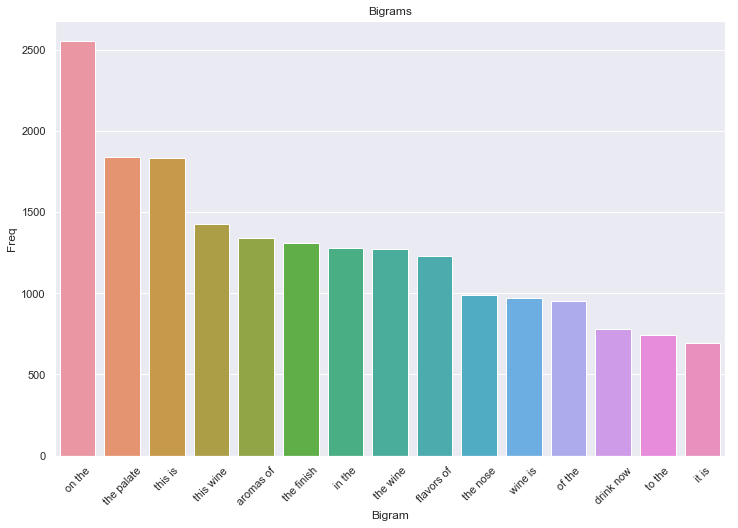

In [264]:
fig = sns.set(rc = {'figure.figsize':(12,8)})
bp = sns.barplot(x = "Bigram", y = "Freq", data = bigram_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 45)
plt.title("Bigrams")
plt.show()

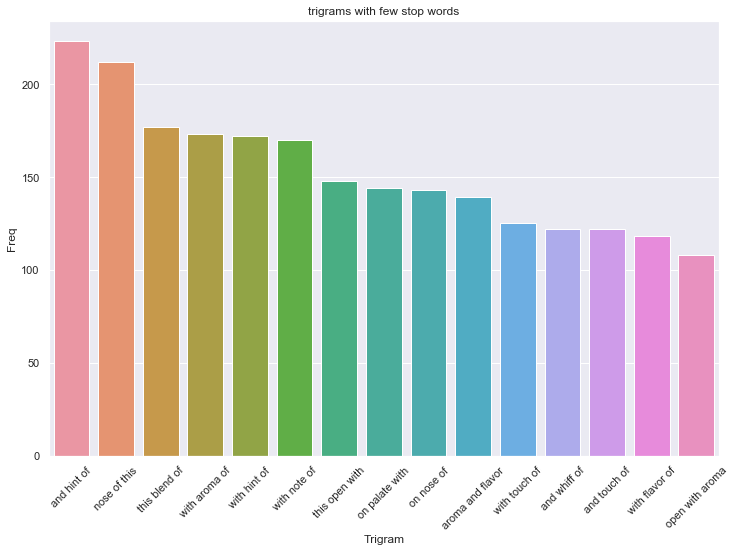

In [262]:
fig = sns.set(rc = {'figure.figsize':(12,8)})
bp = sns.barplot(x = "Trigram", y = "Freq", data = trigrams_stops_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 45)
plt.title("trigrams with few stop words")
plt.show()

In [103]:
#creat a table in the database
wine_data.to_sql('wine_data', conn, if_exists = "replace")
#read the table in the database
wine_df = pd.read_sql('Select * from wine_data', conn)

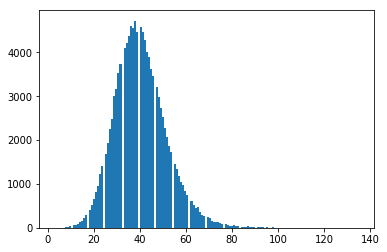

In [95]:
#create a column named color
wine_df["color"] = ""

In [98]:
pd.read_sql("""
SELECT variety, count(variety) as vcount 
FROM wine_data
GROUP BY variety
"""
, conn)

,variety,vcount
0,None,0
1,Abouriou,3
2,Agiorgitiko,63
3,Aglianico,359
4,Aidani,1
...,...,...
703,Zinfandel,2714
704,Zlahtina,2
705,Zweigelt,209
706,Çalkarası,2


## Converting to a matrix of integers

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [273]:
vectorizer = TfidfVectorizer()
tf_idf_data = vectorizer.fit_transform(trigram_df)

In [274]:
tf_idf_data.shape

(2, 2)

In [276]:
type(clean_desc)

list

In [277]:
len(clean_desc)

10000

In [279]:
len(clean_desc[1])

324

In [283]:
len(stop_words)

181

In [284]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

In [ ]:
processed_data = list(map(process_article, data))